# Exploratory Data Analysis

This notebook includes exploratory analysis and visualization of document data.

## Setup

In [3]:
## required packages
# initial imports
import os

# data manipulation and data clean
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# self-defined modules
from document import document
from pipeline import parse_files, load_document


DATA_PATH = '../data'
GLOVE_PAHT = '../glove.6B'
TRAIN_DIR = os.path.join(DATA_PATH, "train")
TEST_DIR = os.path.join(DATA_PATH, "test")

In [4]:
# parameters
stop_words = stopwords.words('english')
stop_words = stop_words + ['would','could','may','also', 'one', 'two', 'three', 'first', 'second' ,'third',
                           'someone', 'anyone', 'something', 'anything', 
                           'subject', 'organization', 'lines','article', 'writes', 'wrote']
tokenize_regex = r"\w+|\$[\d\.]+"

## Load files

In [6]:
train_path_list, ylabel_train = parse_files(TRAIN_DIR)
test_path_list, ylabel_test = parse_files(TEST_DIR)

In [13]:
train_documents = [load_document(path = path, label = y) for path, y in zip(train_path_list, ylabel_train)]
test_documents = [load_document(path = path, label = y) for path, y in zip(test_path_list, ylabel_test)]

Body text from ../data/train/rec.autos/101675 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51839 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51541 is empty.
Body text from ../data/train/rec.sport.baseball/104518 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9972 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9813 is empty.
Body text from ../data/train/rec.sport.hockey/52654 is empty.
Body text from ../data/train/sci.med/59367 is empty.
Body text from ../data/train/rec.motorcycles/103233 is empty.
Body text from ../data/train/comp.windows.x/67032 is empty.
Body text from ../data/train/comp.graphics/37928 is empty.
Body text from ../data/train/comp.graphics/38234 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60353 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60360 is empty.
Body text from ../data/train/misc.forsale/74724 is empty.
Body text from ../data/train/misc.forsale/76071 is empty

In [14]:
len(test_documents)/(len(test_documents)+len(train_documents))

0.4118552324347272

In [15]:
len(test_documents)+len(train_documents)

18844

## Data Cleanning

For convenience, I stored processed data into a data frame and create some features for data exploration.

In [16]:
def create_document_df(document_list, stop_words):
    doc = document_list.copy()
    df = pd.DataFrame([[f, f.path, f._topic, f._group, f.header, f.body, f.lines_of_body] for f in document_list],
                      columns=['document', 'path','topic','group','header','body','lines_of_body'])
    df['document'].apply(lambda x: x.clean_text(word_split_regex = tokenize_regex,
                                                                     stop_words = stop_words,
                                                                     contraction_dict = 'default'))
    df['body_cleaned'] = df['document'].apply(lambda x: x.body)
    df['num_of_words'] = df['document'].apply(lambda x: x.num_of_words)
    df['num_of_punctuations'] = df['document'].apply(lambda x: x.num_of_punctuations)
    df['num_of_special_char'] = df['document'].apply(lambda x: x.num_of_special_char)
    df['num_of_numbers'] = df['document'].apply(lambda x: x.num_of_numbers)
    ps = PorterStemmer()
    df['word_stemmed'] = df['body_cleaned'].apply(lambda x: [ps.stem(w) for w in x.split()])
    df['word_count'] = df['body_cleaned'].apply(lambda x: Counter(x.split()))
    return df

In [17]:
df_doc_train = create_document_df(train_documents, stop_words)
df_doc_test = create_document_df(test_documents, stop_words)

In [18]:
df_doc_train.head()

,document,path,topic,group,header,body,lines_of_body,body_cleaned,num_of_words,num_of_punctuations,num_of_special_char,num_of_numbers,word_stemmed,word_count
0,<document.document object at 0x1a40467ad0>,../data/train/talk.politics.mideast/75895,talk.politics.mideast,talk,From: hm@cs.brown.edu (Harry Mamaysky)\nSubjec...,In article <1993Apr14.125813.21737@ncsu.edu> h...,18,lebanese resistance forces detonated bomb isra...,91,28,7,1,"[lebanes, resist, forc, deton, bomb, isra, occ...","{'lebanese': 4, 'resistance': 2, 'forces': 2, ..."
1,<document.document object at 0x1a40467a50>,../data/train/talk.politics.mideast/76248,talk.politics.mideast,talk,From: waldo@cybernet.cse.fau.edu (Todd J. Dick...,"ab4z@Virginia.EDU (""Andi Beyer"") writes:\n\n> ...",17,never said holocaust said holocaust ignorant h...,75,44,7,0,"[never, said, holocaust, said, holocaust, igno...","{'never': 1, 'said': 2, 'holocaust': 3, 'ignor..."
2,<document.document object at 0x1a4078d690>,../data/train/talk.politics.mideast/76277,talk.politics.mideast,talk,From: C.L.Gannon@newcastle.ac.uk (Space Cadet)...,Andrew Varvel writes:\n>\n>\n> Serdar Argic \n...,21,serdar argic serdar argic merciful compassiona...,43,135,12,0,"[serdar, argic, serdar, argic, merci, compassi...","{'serdar': 4, 'argic': 4, 'merciful': 1, 'comp..."
3,<document.document object at 0x1a4078d710>,../data/train/talk.politics.mideast/76045,talk.politics.mideast,talk,From: shaig@Think.COM (Shai Guday)\nSubject: B...,In article <1993Apr15.204930.9517@thunder.mcrc...,35,guess hasan finally revealed source claim isra...,132,82,30,0,"[guess, hasan, final, reveal, sourc, claim, is...","{'guess': 1, 'hasan': 3, 'finally': 1, 'reveal..."
4,<document.document object at 0x1a4078d790>,../data/train/talk.politics.mideast/76283,talk.politics.mideast,talk,From: koc@rize.ECE.ORST.EDU (Cetin Kaya Koc)\n...,> Problem 1\n> \n> My father told me the follo...,15,problem father told following story famous war...,65,48,2,10,"[problem, father, told, follow, stori, famou, ...","{'problem': 1, 'father': 1, 'told': 1, 'follow..."


## Exploratory Data Analysis

In [19]:
df_train = df_doc_train.drop(['document', 'header', 'word_stemmed'], axis = 1)
df_test = df_doc_test.drop(['document', 'header', 'word_stemmed'], axis = 1)
classes = sorted(df_train['topic'].unique().tolist())
groups = sorted(df_train['group'].unique().tolist())

### Distribution of document counts

<h4>Observations:</h4>

* Generally, both train and test sets are balanced over classes.
* Both distributions over groups are unbalanced. Some groups have only one class and therefore have less documents.
* Distributions of train set and test set are similar except for rec.sport.hockey and sci.med groups.

Text(0, 0.5, 'Topic class')

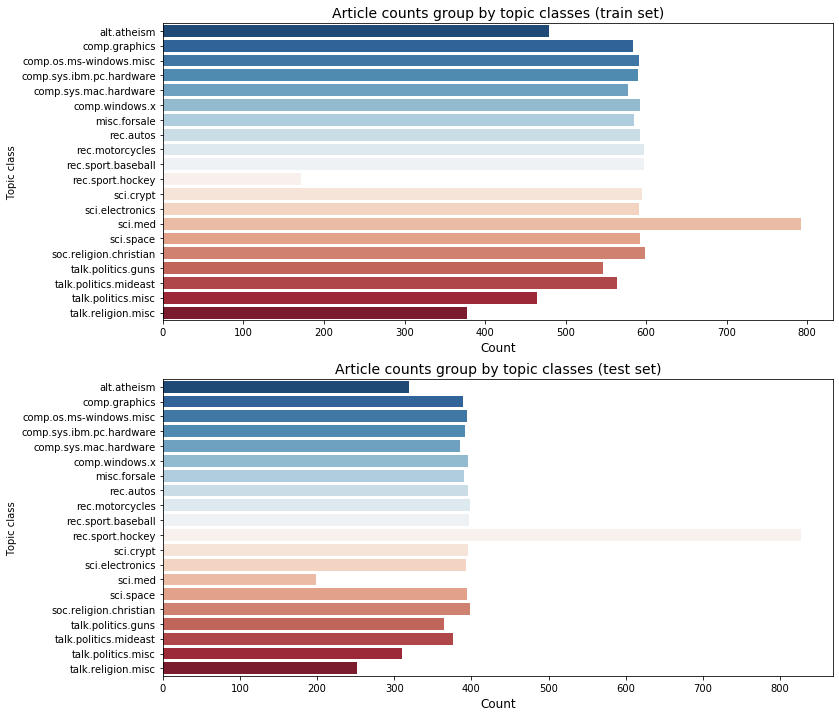

In [22]:
# document counts group by topic classes
plt.figure(figsize=(12,12))
pallette = 'RdBu_r'

plt.subplot(211)
ax = sns.countplot(y='topic', data = df_train, 
                   order = classes, palette = pallette)
ax.set_title('Article counts group by topic classes (train set)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Topic class')

plt.subplot(212)
ax1 = sns.countplot(y='topic', data = df_test, 
                   order = classes, palette = pallette)
ax1.set_title('Article counts group by topic classes (test set)', fontsize=14)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Topic class')

Text(0, 0.5, 'Topic class')

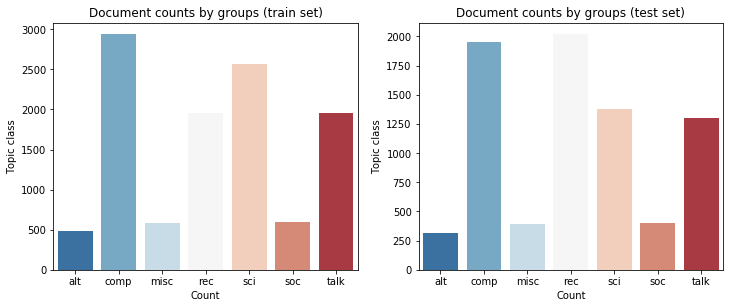

In [23]:
# document counts group by first-level group
plt.figure(figsize=(12,10))
pallette = 'RdBu_r'

plt.subplot(221)
ax = sns.countplot(x='group', data = df_train, 
                   order = groups, palette = pallette)
ax.set_title('Document counts by groups (train set)', fontsize=12)
ax.set_xlabel('Count', fontsize=10)
ax.set_ylabel('Topic class')

plt.subplot(222)
ax1 = sns.countplot(x='group', data = df_test, 
                   order = groups, palette = pallette)
ax1.set_title('Document counts by groups (test set)', fontsize=12)
ax1.set_xlabel('Count', fontsize=10)
ax1.set_ylabel('Topic class')

### Distribution of lines in body text

<h4>Obeservations:</h4>
    
* More than 50% of documents have lines between 10 and 30.
* Some documents are extremely long (thousands of lines). 
* There are 13 documents with more than 1000 line. 11 of them are computer/science related, which the remaining 2 are politics.
* Documents in computer/science group contains a lot of duplicated special characters and digits. I remained them because thet might make an effect on word account distribution. Meanwhile, documents in the politics group contain much lesser special characters and digits.
* Although most of outliers appear in the computer/science group, on average, the lines of talk/social documents are longer than other groups. The text in computer group are the shortest on average.

In [84]:
df_train['lines_of_body'].describe()

count    11083.000000
mean        31.821258
std         74.056123
min          0.000000
25%         11.000000
50%         18.000000
75%         30.000000
max       1415.000000
Name: lines_of_body, dtype: float64

In [129]:
print(df_train[df_train.lines_of_body>1000].shape)
df_train.loc[df_train.lines_of_body>1000,'topic']

(13, 11)


3326    comp.os.ms-windows.misc
3812                  sci.crypt
3895                  sci.crypt
3933                  sci.crypt
3945                  sci.crypt
5237         talk.politics.misc
6454             comp.windows.x
6506             comp.windows.x
6608             comp.windows.x
7008              comp.graphics
7029              comp.graphics
8153            sci.electronics
8827         talk.politics.guns
Name: topic, dtype: object

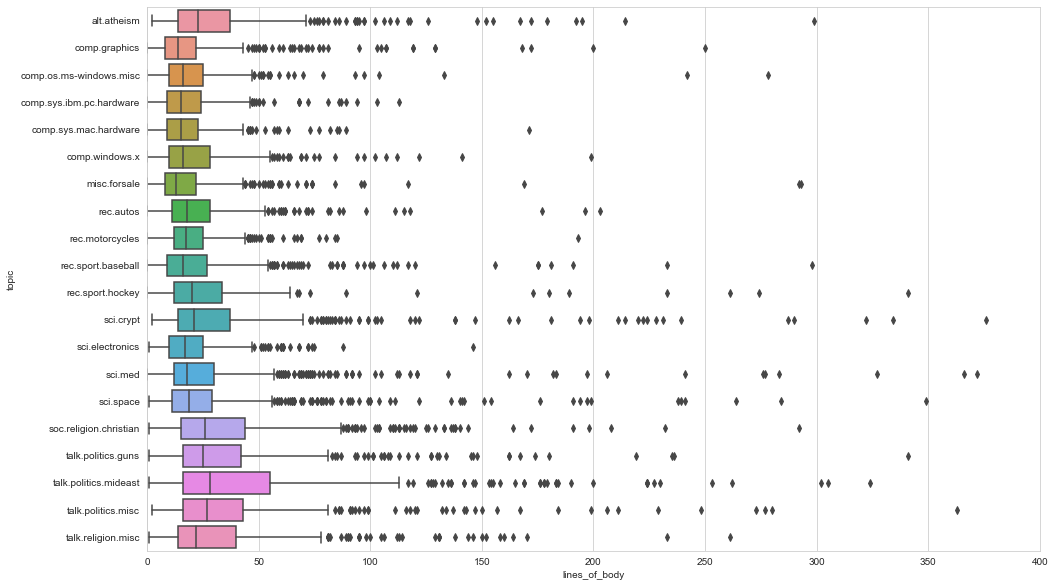

In [121]:
plt.figure(figsize=(16,10))
plt.xlim(0, 400)
sns.set_style("whitegrid")
sns.boxplot(y='topic', x = 'lines_of_body', order = classes,data = df_train)
#set(xlim=(0,800))

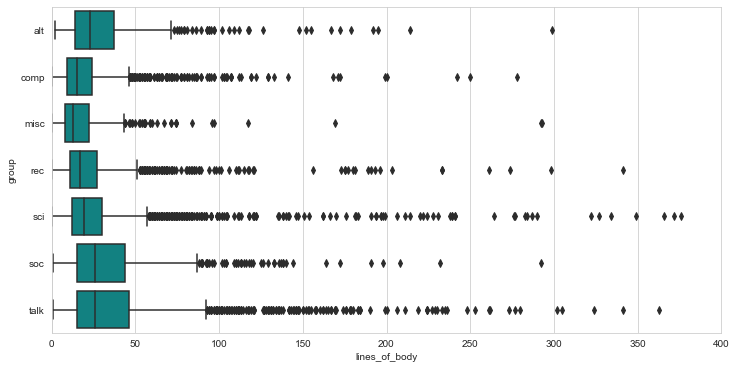

In [122]:
plt.figure(figsize=(12,6))
plt.xlim(0, 400)
sns.boxplot(y='group',x='lines_of_body', order = groups, data=df_train, color='#009393')

Check out the extremly long text:

In [104]:
# before cleaning
print(df_train.iloc[3326]['body'])

In article <1993Apr17.023017.17301@gmuvax2.gmu.edu> rwang@gmuvax2.gmu.edu (John Wang) writes:
|Hi, everybody:
|    I guess my subject has said it all.  It is getting boring
|looking at those same old bmp files that came with Windows.  So,
|I am wondering if there is any body has some beautiful bmp file
|I can share.  Or maybe somebody can tell me some ftp site for
|some bmp files, like some scenery files, some animals files,
|etc....  I used to have some, unfortunately i delete them all.
|
|Anyway could me give me some help, please???
|

	In response to a "different" kinda wallpaper, here's what I
use.  I think the original gif/whatever was called "not_real".  The 
artist name and logo is in the lower right corner.  You will need VGA
I think, and I have this sized for 800x600 256 color screens.  Use
this in your Windows directory and do not tile it.  Hope you enjoy.


BEGIN ----------------------- CUT HERE ---------------
begin 666 ntreal.bmp
M0DTV5P<      #8$   H    ( ,  %@"   !  @   

In [105]:
# after cleaning
df_train.iloc[3326]['body_cleaned']

'everybody guess said getting boring looking old bmp files came windows wondering body beautiful bmp file share maybe somebody tell ftp site bmp files like scenery files animals files etc used unfortunately delete anyway give help please response different kinda wallpaper use think original gif whatever called not_real artist name logo lower right corner need vga think sized 800x600 256 color screens use windows directory tile hope enjoy begin cut begin 666 ntreal bmp m0dtv5p m4pa 4wa 9tj3 kkzp td4i zgb0 bbzx 4fj x6xl rq0 tk2 m8cv duj gh_p q05 nhup sf4 qo0 hqox y7k0 m2f 8gh uiu d82 d000 lpbp q2el qfo0 5dt uv4 3hd k7_ 670 61aj 2nw 6gre tttt 4yv ejd i8p 302 _kr to3 ati hso0 2_ox _g16 erd sbp d00 i3g j090 y2t b7_0 zut 4bej p04 z5m 8ic hzbp eyk vl_6jlk z6e k4u 34u 6ql 0el 6ql 0el 0em 6um 0emim2frm34u 6eu 6eu 74u 6ei 74i 74u k4u 34rdo4u hqu mim0 0em fumu w4u 4mn m4m uyy a186 0k5 m86 v6c5r mmn c6v6 8ma1r 34kyrmrw7 rp32 x7pa30t s0t0 x4t 145 u129f9 y24 y24e 4a91 _0d 147 144e145 4do1t qsh cr7 2

In [106]:
# before cleaning
print(df_train.iloc[3812]['body'])

I got a number of requests for code.
So, here it is.
Its written in 80x86 ASM. 
Borland TASM will do.

TASM LGA.ASM
TLINK /t LGA.ASM


The code:

;----------------------------------------------------------------------
; LGA ncryption
; (C) by Nick Nassuphis
;----------------------------------------------------------------------

CODE	SEGMENT
	ASSUME	CS:CODE, DS:CODE
	
	ORG	100h

Start:
	JMP	Begin

;----------------------------------------------------------------------
;
; Gas particle assigment:
;
; BIT 0    particle moving EAST
; BIT 1    particle moving WEST
; BIT 2    particle moving NORTH
; BIT 3    particle moving SOUTH
;
; BIT 4    particle moving EAST
; BIT 5    particle moving WEST
; BIT 6    particle moving NORTH
; BIT 7    particle moving SOUTH
;
;
; Collisiong Rules:
;
; 1. Gas Rules
;
; IF (E & W) AND !(N & S) THEN (E,W)->(N,S)
; IF (N & S) AND !(E & W) THEN (N,S)->(E,W)
;
; for nibbles:
;
; 1100 -> 0011
; 0011 -> 0011
;
; and for bytes:
;
; 11000000 -> 00110000
; 00110000 

In [114]:
# after cleaning: a lot of duplicatd strings
print(df_train.iloc[3812]['body_cleaned'])

got number requests code written 80x86 asm borland tasm tasm lga asm tlink lga asm code lga ncryption nick nassuphis code segment assume code code org 100h start jmp begin gas particle assigment bit particle moving east bit particle moving west bit particle moving north bit particle moving south bit particle moving east bit particle moving west bit particle moving north bit particle moving south collisiong rules gas rules nibbles 1100 0011 0011 0011 bytes 11000000 00110000 00110000 11000000 00001100 00000011 00000011 00001100 00110011 11001100 00111100 11000011 11000011 00111100 11001100 00110011 reflection rules swap bits along directions look table implements particle collisions hpp lattice gas hpprule 00000000b 00000000 00000001b 00000001 00000010b 00000010 00001100b 00000011 00000100b 00000100 00000101b 00000101 00000110b 00000110 00000111b 00000111 00001000b 00001000 00001001b 00001001 00001010b 00001010 00001011b 00001011 00000011b 00001100 00001101b 00001101 00001110b 00001110 0

Finally, let's look at what political document looks like.

In [115]:
# before cleaning: much less digits and special characters
print(df_train.iloc[5237]['body'])

THE WHITE HOUSE

Office of the Press Secretary
_____________________________________________________________________
For Immediate Release                                  April 15, 1993


PRESS BRIEFING
BY GEORGE STEPHANOPOULOS

The Briefing Room



1:04 P.M. EDT
	     
	     
	     MR. STEPHANOPOULOS:  Good afternoon.  
	     
	     Q	  Could we do this on the lawn?
	     
	     MR. STEPHANOPOULOS:  That would be nice.  Let's go out 
to the cherry blossoms.  We'll do like the President.
	     
	     Q	  Is the stimulus package dead? 
	     
	     MR. STEPHANOPOULOS:  Absolutely not.  
	     
	     Q	  Can you tell us more about the Dole talks?  You 
said it was a good visit, but no compromise.
	     
	     MR. STEPHANOPOULOS:  Yes.  The President had a good talk 
with Senator Dole last night.  I think that as we said before, there 
were no specific compromises on either side, although it was a very 
good discussion about the jobs package and about other issues as 
well.  As you know,

In [116]:
print(df_train.iloc[5237]['body_cleaned'])

white house office press secretary immediate release april 1993 press briefing george stephanopoulos briefing room edt stephanopoulos good afternoon lawn stephanopoulos nice let cherry blossoms like president stimulus package dead stephanopoulos absolutely tell dole talks said good visit compromise stephanopoulos yes president good talk senator dole last night think said specific compromises either side although good discussion jobs package issues well know president called senator dole believe tuesday night talk russian aid package speak senator dole called back wednesday morning president instead spoke tony lake close conversation indicated wanted speak president jobs stimulus package finally talked yesterday afternoon close discussion said another talk last night senator new hampshire although specific compromises made either side say continue discussions well giving standing making concessions stephanopoulos know phase compromise made president said consistently intends come forwar

### Augmented features

In [125]:
df_train.columns

Index(['path', 'topic', 'group', 'body', 'lines_of_body', 'body_cleaned',
       'num_of_words', 'num_of_punctuations', 'num_of_special_char',
       'num_of_numbers', 'word_count'],
      dtype='object')

I retrieved the following numerical features while cleaning documents. Let's see how these features look like in differnt classes.

* Number of punctuations in the original body text
* Number of special characters in the original body text
* Number of numbers in the original body text
* Number of words after cleaning

In [25]:
df_train[['lines_of_body', 'num_of_special_char', 'num_of_numbers', 'num_of_words']].describe()

,lines_of_body,num_of_special_char,num_of_numbers,num_of_words
count,11083.000000,11083.000000,11083.000000,11083.000000
mean,31.821258,38.212849,19.857078,132.877199
std,74.056123,475.103386,246.797981,320.062319
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,1.000000,40.000000
50%,18.000000,10.000000,3.000000,72.000000
75%,30.000000,20.000000,9.000000,126.000000
max,1415.000000,22742.000000,8829.000000,6132.000000


In [167]:
df_train[['num_of_punctuations', 'num_of_special_char', 'num_of_numbers', 'num_of_words']]\
.quantile([0,0.25,0.5,0.75,0.9,0.95,0.99,1])

,num_of_punctuations,num_of_special_char,num_of_numbers,num_of_words
0.00,0.00,0.00,0.00,0.0
0.25,26.00,12.00,1.00,40.0
0.50,55.00,29.00,3.00,72.0
0.75,120.00,78.00,9.00,126.0
0.90,213.00,170.80,17.00,227.0
0.95,289.00,218.00,27.90,362.0
0.99,841.34,508.18,145.72,1184.8
1.00,30860.00,28797.00,8829.00,6132.0


Text(0.5, 1.0, 'Number of Numbers')

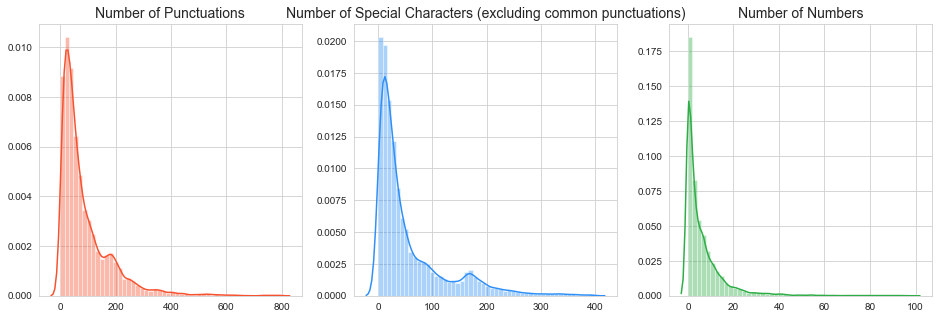

In [165]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
#sns.plt.ylim(0, 20)

num_of_punctuations = df_train.loc[df_train["num_of_punctuations"]<800,"num_of_punctuations"].values
num_of_special_char = df_train.loc[df_train["num_of_special_char"]<400,"num_of_special_char"].values
num_of_numbers = df_train.loc[df_train["num_of_numbers"]<100,"num_of_numbers"].values

sns.distplot(num_of_punctuations, ax=ax[0], color="#F7522F")
ax[0].set_title("Number of Punctuations", fontsize=14)

sns.distplot(num_of_special_char, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Number of Special Characters (excluding common punctuations)", fontsize=14)

sns.distplot(num_of_numbers, ax=ax[2], color="#2EAD46")
ax[2].set_title("Number of Numbers", fontsize=14)

Text(0.5, 1.0, 'Number of Words)')

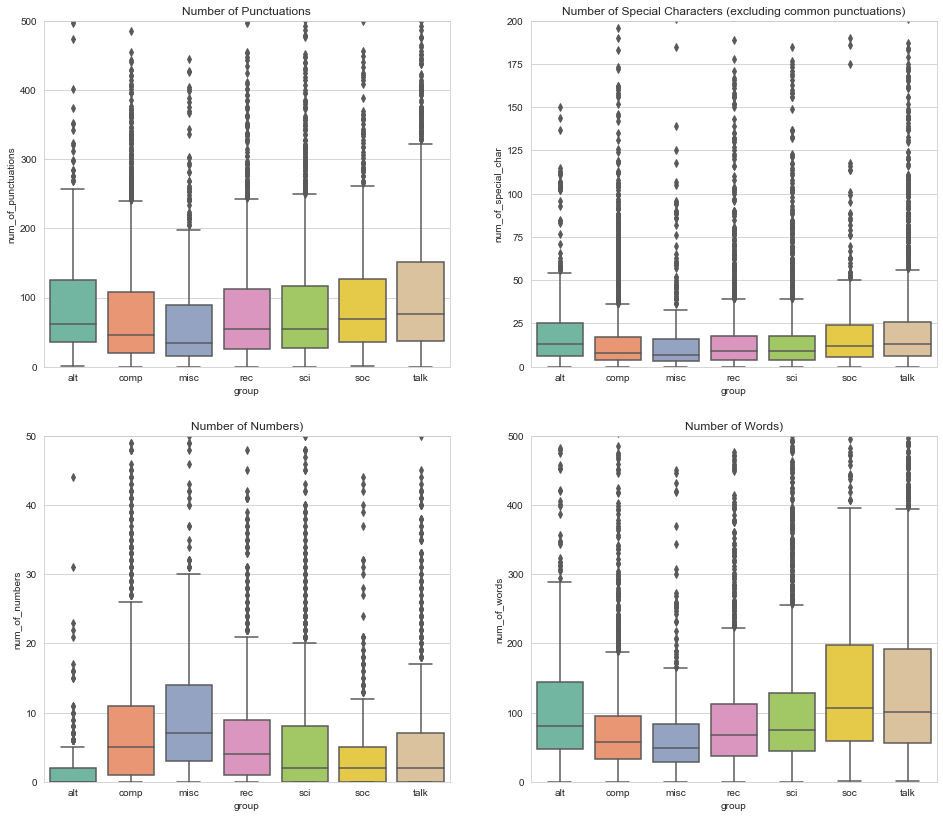

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
sns.set_style('whitegrid')

sns.boxplot(x='group', y='num_of_punctuations', data=df_train, 
            order=groups, ax=ax[0][0], palette="Set2" )
ax[0][0].set_ylim(0, 500)
ax[0][0].set_title("Number of Punctuations", fontsize=12)

sns.boxplot(x='group', y='num_of_special_char', data=df_train, 
            order=groups, ax=ax[0][1], palette="Set2" )
ax[0][1].set_ylim(0, 200)
ax[0][1].set_title("Number of Special Characters (excluding common punctuations)", fontsize=12)

sns.boxplot(x='group', y='num_of_numbers', data=df_train, 
            order=groups, ax=ax[1][0], palette="Set2" )
ax[1][0].set_ylim(0, 50)
ax[1][0].set_title("Number of Numbers)", fontsize=12)

sns.boxplot(x='group', y='num_of_words', data=df_train, 
            order=groups, ax=ax[1][1], palette="Set2" )
ax[1][1].set_ylim(0, 500)
ax[1][1].set_title("Number of Words)", fontsize=12)

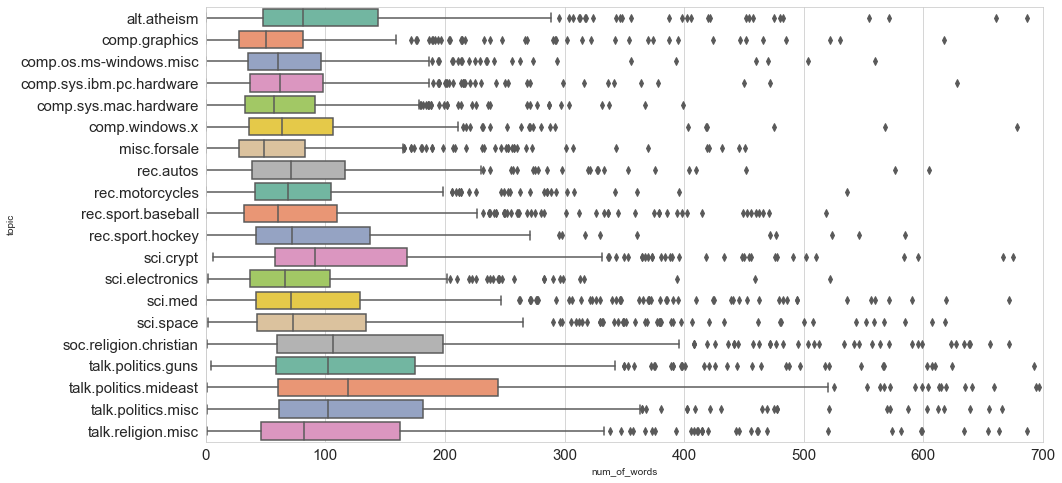

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.xlim(0, 700)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.boxplot(y='topic',x='num_of_words', data=df_train, order = classes, palette="Set2" )

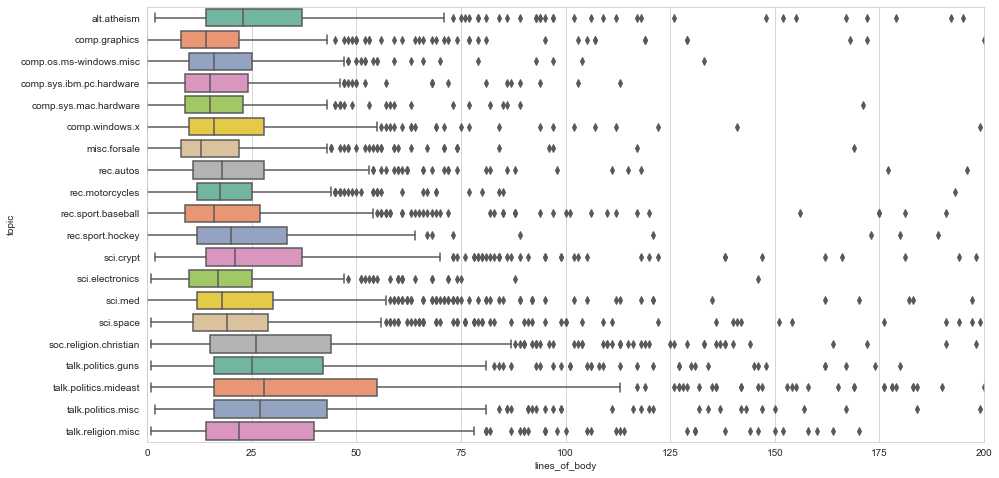

In [196]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.xlim(0, 200)
#sns.violinplot(x="group", y="num_of_special_char", data=df_train, palette="Set2" )
sns.boxplot(y='topic',x='lines_of_body', data=df_train, order = classes, palette="Set2" )

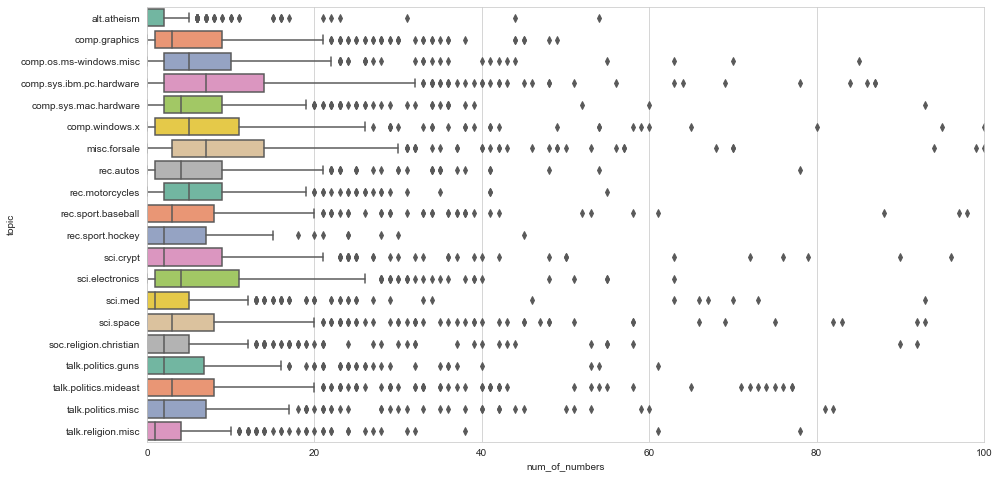

In [197]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.xlim(0, 100)
#sns.violinplot(x="group", y="num_of_special_char", data=df_train, palette="Set2" )
sns.boxplot(y='topic',x='num_of_numbers', order = classes, data=df_train, palette="Set2" )

### Most frequent words

<h4>Obeservations:</h4>

* 'Like' appear frequently in almost every classes, so I would filter it out as stop words.

In [260]:
def word_count_visualization(word_dist, topic='entire set', top_n = 30):
    '''Visualize most frequent words'''
    
    df_word_freq = pd.DataFrame(word_dist.most_common(top_n),
                columns=['Word', 'Frequency']).set_index('Word')

    plt.style.use('ggplot')
    title ="Most Frequent Words (%s)"%(topic)
    df_word_freq.plot.bar(rot=60, legend=False,figsize=(15,5), 
                          color='g',title= title)
    plt.ylabel("Occurrence Count")
    plt.xlabel("Most Frequent Words")
    plt.xticks(fontsize=13)
    plt.show()

In [198]:
df_word_count = df_train[['topic','group','word_count']]
word_dist = df_word_count['word_count'].sum()

In [244]:
top_n = 200
df_word_freq = pd.DataFrame(word_dist.most_common(top_n),
                columns=['Word', 'Frequency']).set_index('Word')
print('The top 100 frequent words in the train set (descending order):\n', df_word_freq.index[:100].values)
print('\nThe top 100-200 frequent words in the train set (descending order):\n',df_word_freq.index[100:].values)

The top 100 frequent words in the train set (descending order):
 ['people' 'like' 'know' 'get' 'max' 'think' 'use' 'time' 'good' 'new'
 'well' 'even' 'see' 'way' 'god' 'many' 'much' 'make' 'system' 'right'
 'say' 'want' 'used' 'said' 'work' 'need' 'problem' 'really' 'please'
 'since' 'believe' 'still' 'file' 'back' 'going' 'information' 'using'
 'find' 'thanks' 'mail' 'years' 'take' 'year' 'must' 'government' 'point'
 'things' 'never' 'might' 'better' 'last' 'windows' 'without' 'sure'
 'number' 'question' 'help' 'program' 'another' 'etc' 'space' 'read' 'key'
 'got' 'bit' 'available' 'data' 'drive' 'made' 'thing' 'long' 'let' 'law'
 'case' 'look' 'world' 'part' 'come' 'however' 'university' 'day' 'little'
 'power' 'fact' 'true' 'every' 'around' 'seems' 'state' 'probably' 'give'
 'tell' 'course' 'name' 'least' 'different' 'set' 'enough' 'try' 'car']

The top 100-200 frequent words in the train set (descending order):
 ['software' 'computer' 'best' 'run' 'lot' 'high' 'g9v' 'jesus' 'life'


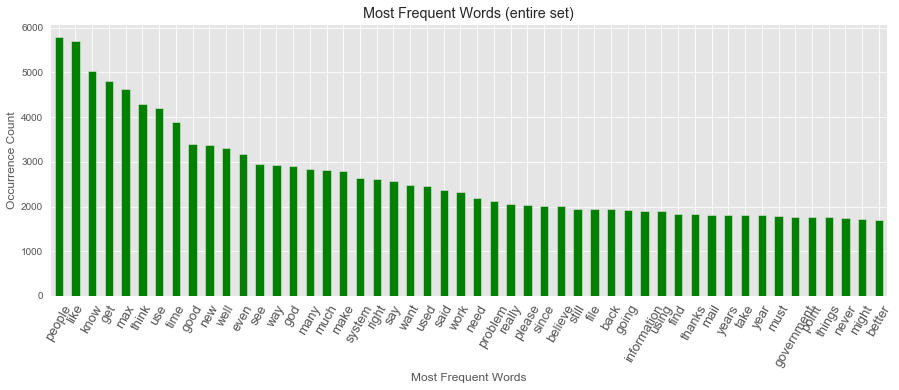

In [261]:
word_count_visualization(word_dist, top_n=50)

In [223]:
word_dist_bytopic = df_word_count.groupby('topic')['word_count'].sum()
word_dist_bytopic

topic
alt.atheism                 {'date': 23, 'fri': 7, 'apr': 26, '1993': 26, ...
comp.graphics               {'know': 228, 'weitek': 6, 'p9000': 4, 'graphi...
comp.os.ms-windows.misc     {'used': 97, 'hercules': 9, 'graphite': 12, 'a...
comp.sys.ibm.pc.hardware    {'gosh': 10, 'think': 111, 'installed': 59, 'v...
comp.sys.mac.hardware       {'seen': 57, 'following': 36, 'problem': 228, ...
comp.windows.x              {'hello': 27, 'everybody': 3, 'hope': 14, 'ins...
misc.forsale                {'texas': 5, 'instruments': 5, 'procalc': 3, '...
rec.autos                   {'another': 83, 'user': 3, 'recently': 30, 're...
rec.motorcycles             {'ever': 40, 'heard': 48, 'rider': 86, 'giving...
rec.sport.baseball          {'kevin': 25, 'mundstock': 1, 'joe': 44, 'robb...
rec.sport.hockey            {'quoting': 1, 'cire': 1, 'trehguad': 1, 'cyt'...
sci.crypt                   {'interesting': 49, 'note': 114, 'regard': 16,...
sci.electronics             {'greetings': 11, 'situation':

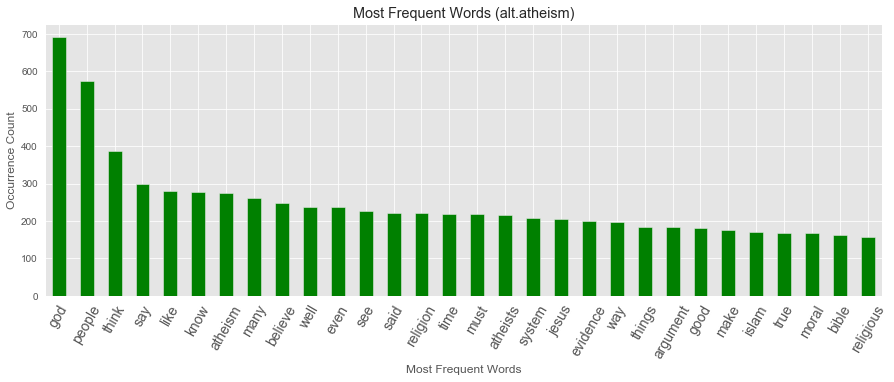

In [232]:
# alt.atheism 
word_count_visualization(word_dist_bytopic[0], classes[0])

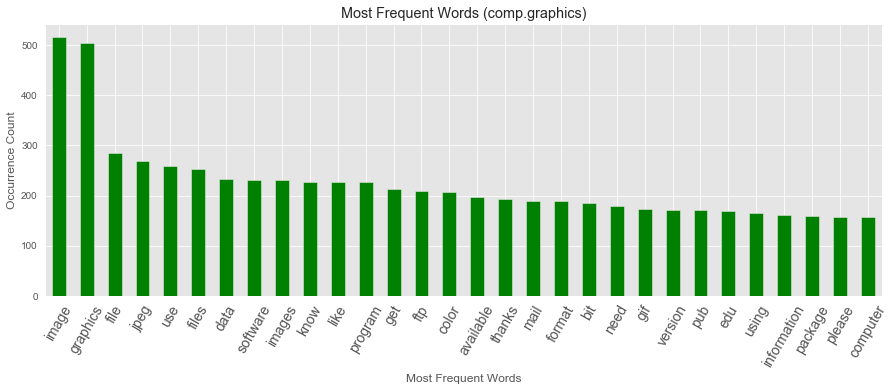

In [233]:
# comp.graphics
word_count_visualization(word_dist_bytopic[1], classes[1])

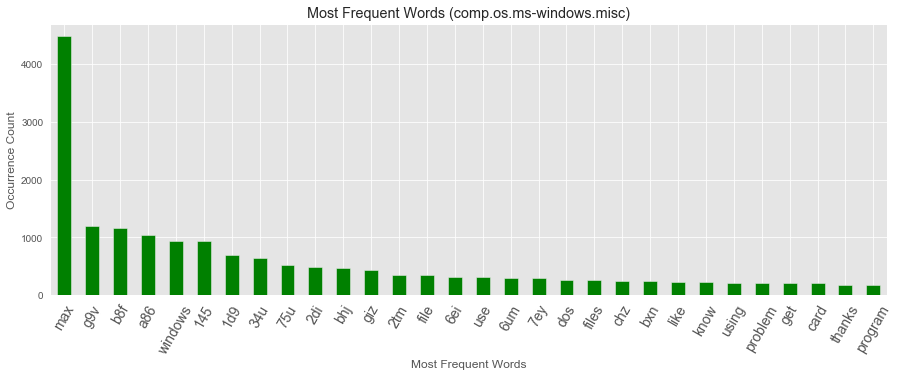

In [234]:
# comp.os.ms-windows.misc 
word_count_visualization(word_dist_bytopic[2], classes[2])

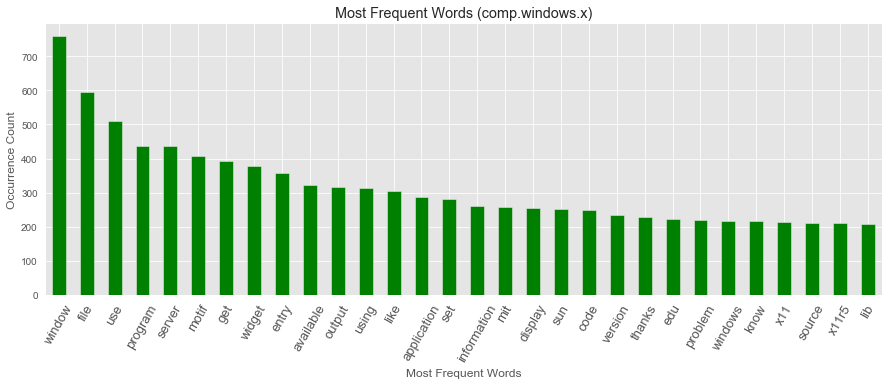

In [265]:
word_count_visualization(word_dist_bytopic[5], classes[5])

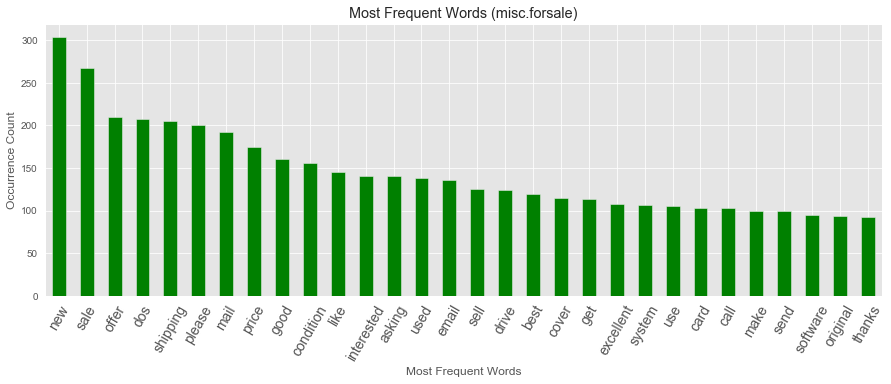

In [235]:
word_count_visualization(word_dist_bytopic[6], classes[6])

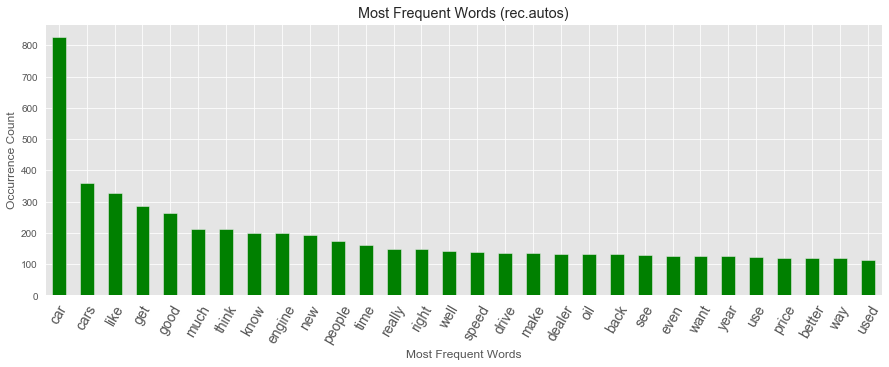

In [236]:
word_count_visualization(word_dist_bytopic[7], classes[7])

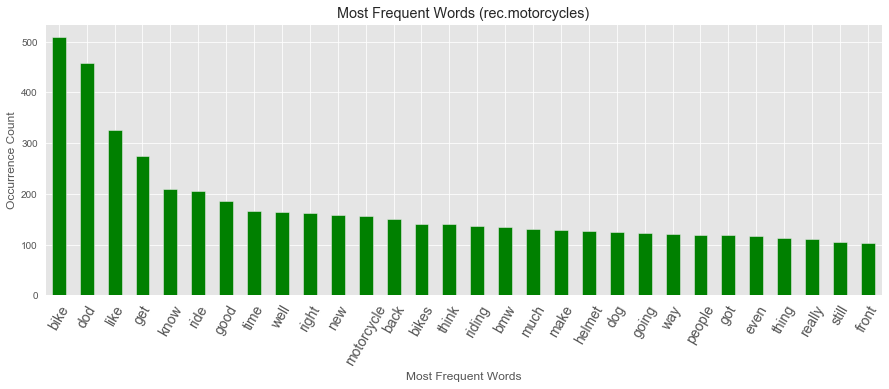

In [237]:
word_count_visualization(word_dist_bytopic[8], classes[8])

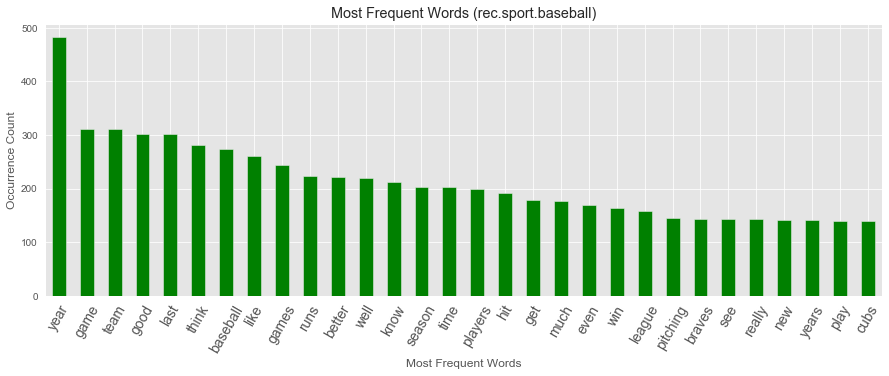

In [238]:
word_count_visualization(word_dist_bytopic[9], classes[9])

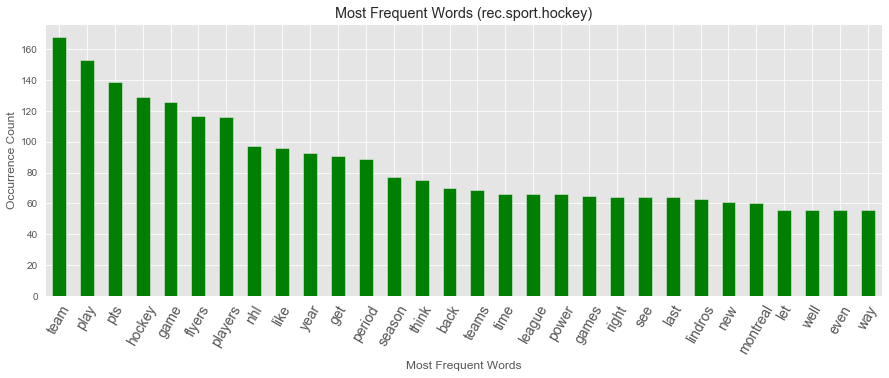

In [245]:
word_count_visualization(word_dist_bytopic[10], classes[10])

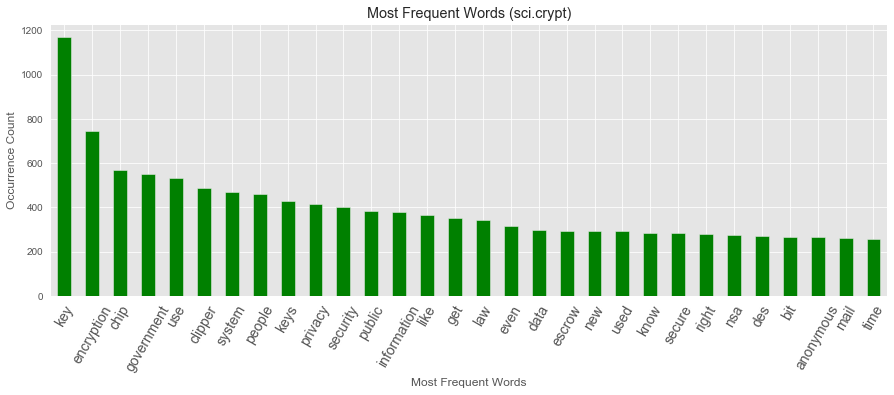

In [247]:
word_count_visualization(word_dist_bytopic[11], classes[11])

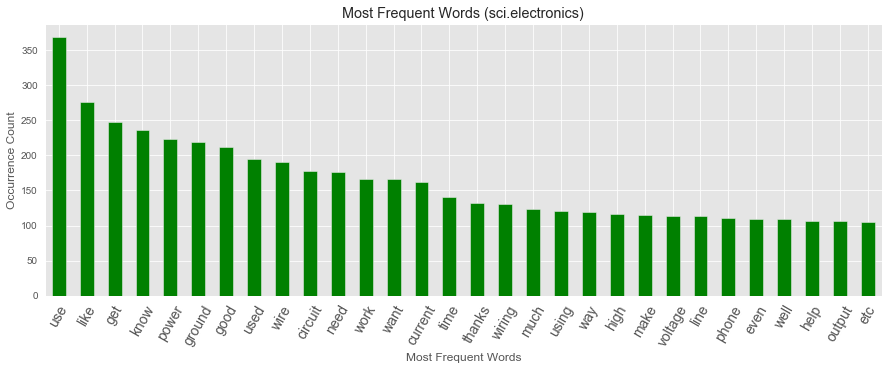

In [248]:
word_count_visualization(word_dist_bytopic[12], classes[12])

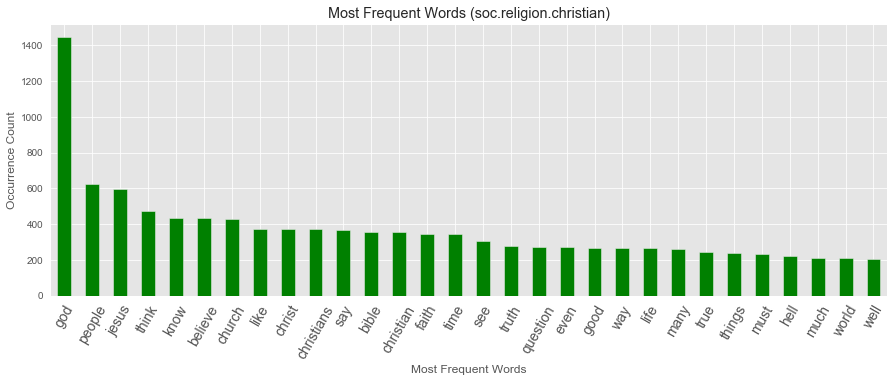

In [250]:
word_count_visualization(word_dist_bytopic[15], classes[15])

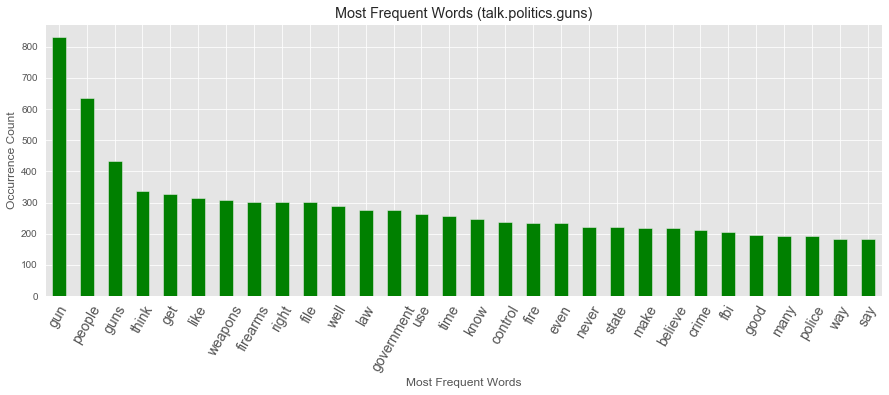

In [251]:
word_count_visualization(word_dist_bytopic[16], classes[16])

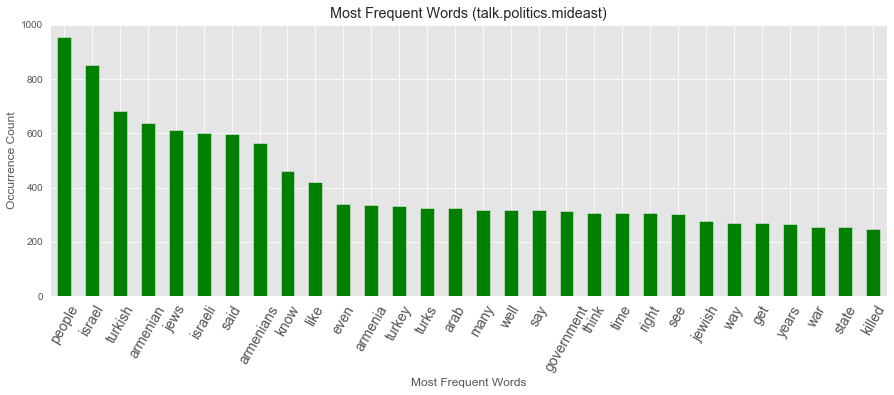

In [252]:
word_count_visualization(word_dist_bytopic[17], classes[17])

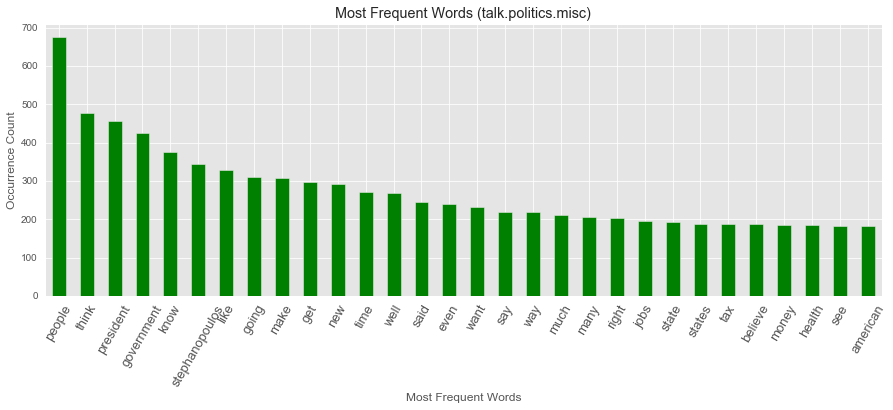

In [264]:
word_count_visualization(word_dist_bytopic[18], classes[18])

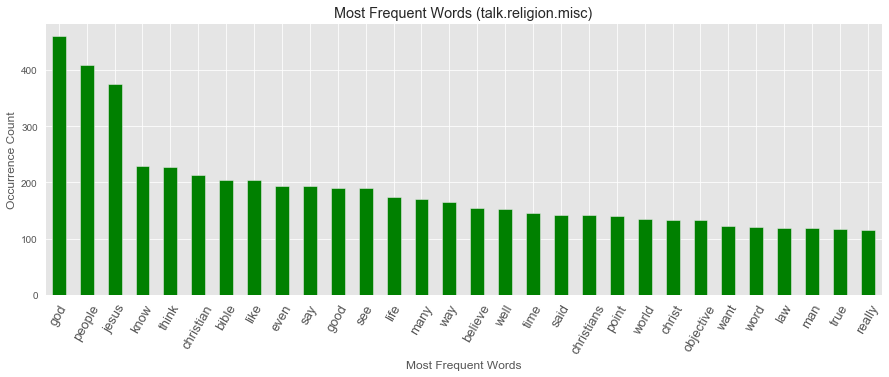

In [262]:
word_count_visualization(word_dist_bytopic[19], classes[19])